# Introduction à BioPython

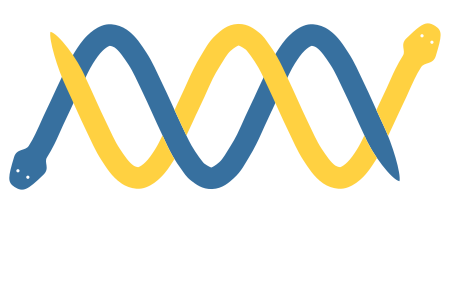

**BioPython** est une bibliothèque Python pour les analyses bioinformatiques. Elle permet d'automatiser des tâches comme la manipulation de séquences, l'accès à des bases de données biologiques, et la visualisation d'arbres phylogénétiques. Ce notebook Jupyter explore ses principales fonctionnalités avec une série d'exemples, il sera suivi d'un autre notebook comprenant un exercise pratique.

Objectifs d'apprentissage :
1. Découvrir les bases de BioPython.
2. Manipuler des séquences biologiques.
3. Explorer des fichiers biologiques comme FASTA.
4. Accéder et analyser des bases de données en ligne.
5. Travailler avec des arbres phylogénétiques.

## I/ Manipulation de séquences

Commençons par importer le module nécessaire.

In [2]:
from Bio.Seq import Seq
print('Module importé avec succès.')

Modules importés avec succès.


### L'objet Seq
Comme nous l'avons vu précédemment, la manipulation de séquences ADN, ARN et protéiques est essentielle en bioinformatique, que ce soit pour leur analyse, annotation, ou la conception de nouvelles séquences. 

* L'objet `Seq` de BioPython facilite ces tâches. Il agit comme un objet `string` mais offre des fonctionnalités supplémentaires.

In [3]:
# Création d'un objet Seq
seq = Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
print('Séquence:', seq)

Séquence: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


En plus d'agir comme un objet `string`, l'objet `Seq` supporte des méthodes qui vous vont permettre d'obtenir :

* Le complément d'une séquence :

In [4]:
print('Complément:', seq.complement())

Complément: TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC


* Son complément inverse :

In [4]:
print('Complément inverse:', seq.reverse_complement())

Complément inverse: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT


* Sa transcription en ARN :

In [66]:
print('Transcription (ARN messager):', seq.transcribe())

Transcription (ARN messager): AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG


* La transcription inverse de l'ARN en ADN :

In [5]:
arn_messager = seq.transcribe()

print('Transcription (ARN messager):', arn_messager.back_transcribe())

Transcription (ARN messager): ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


* Ou encore sa traduction (faisable soit avec une séquence ADN, soit avec sa transcription en ARN) :

In [6]:
print('Traduction (séquence protéique):', seq.translate())
print('Traduction (séquence protéique):', arn_messager.translate())

Traduction (séquence protéique): MAIVMGR*KGAR*
Traduction (séquence protéique): MAIVMGR*KGAR*


* Les astérisques `*` correspondent à des codons STOP (UAA, UAG ou UGA), on peut choisir d'arrêter la traduction de la séquence lorsqu'un codon stop est détecté avec l'option suivante :

In [7]:
print('Traduction (séquence protéique):', seq.translate(to_stop = True))

Traduction (séquence protéique): MAIVMGR


* On peut aussi changer le symbole STOP si besoin :

In [8]:
print('Traduction (séquence protéique):', seq.translate(stop_symbol = '@'))

Traduction (séquence protéique): MAIVMGR@KGAR@


* Si la séquence contient des caractères gaps `-`, il faudra les remplacer par des "N" afin que BioPython les interprète comme des caractères manquants. Les acides aminés indéterminés seront indiqués par la lettre "X" :

In [131]:
seq_gaps = Seq('ATGGCCATTGTAA--GGCCGCTGA-AGGGTG--CGATAG')

print('Traduction (séquence protéique):', seq_gaps.replace("-", "N").translate())

Traduction (séquence protéique): MAIVXGR*XGXR*


* On peut convertir chaque acide aminé de la séquence protéique de son code à 1 caractère à son code à 3 caractères avec la fonction `seq3` de `SeqUtils` ("Ter" correspondant à un codon STOP):

In [9]:
from Bio.SeqUtils import seq3

seq_prot_3lettres = seq3(seq.translate())
print(seq3(seq.translate()))

MetAlaIleValMetGlyArgTerLysGlyAlaArgTer


* Et inversement avec la fonction `seq1` :

In [11]:
from Bio.SeqUtils import seq1

print(seq1(seq_prot_3lettres))

MAIVMGR*KGAR*


### Indexation et comptage

* Comme avec des objets `string`, on peut accéder à chaque élément d'un objet `Seq` en utlisant son index (en sachant qu'avec Python, l'indexation commence à 0).

In [5]:
seq = Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

print('Premier caractère :', seq[0])  # 1er caractère/nucléotide
print('Troisième caractère :', seq[2])  # 3ème caractère/nucléotide
print('Dernier caractère :', seq[-1])  # Dernier caractère/nuclétoide

Premier caractère : A
Troisième caractère : G
Dernier caractère : G


* Tout comme les ojets `string`, l'objet `Seq` a une méthode `.count()` qui permet de compter le nombre de fois qu'un caractère spécifique (ou une séquence de caractères) apparaît dans la séquence :

In [22]:
# Nombre d'adénines dans la séquence
print('Nombre de "A" dans la séquence :', seq.count("A"))

# Nombre de fois qu'une adénine est directement suivie d'une thymine dans la séquence
print('Nombre de "AT" dans la séquence :', seq.count("AT"))

Nombre de "A" dans la séquence : 9
Nombre de "GG" dans la séquence : 3


* L'objet `Seq` a aussi une méthode `.count_overlap()` qui permet de compter le nombre de fois qu'une séquence de caractères apparaît dans la séquence tout en comptabilisant les motifs superposés :

In [24]:
# Nombre de fois qu'une guanine est suivie d'une autre dans la séquence
print('Nombre de "GG" superposés dans la séquence :', seq.count_overlap("GG"))

Nombre de "GG" superposés dans la séquence : 5


* On peut aussi vérifier si un motif est contenu dans une séquence avec `in` de la manière suivante :

In [29]:
print('"ACC" contenu dans la séquence ? -->', "ACC" in seq)
print('"TAA" contenu dans la séquence ? -->', Seq("TAA") in seq)

"ACC" contenu dans la séquence ? --> False
"TAA" contenu dans la séquence ? --> True


* La fonction `len()` permet de donner la longueur de la séquences :

In [19]:
print('Longueur de la séquence :', len(seq), 'caractères')

Longueur de la séquence : 15 caractères


* Dans certains cas, l'analyse biologique de la séquence demandera de calculer le ratio de GC, on pourra ainsi le faire de la manière suivante :

In [115]:
# Longueur de la séquence
seq = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print('Longueur de la séquence :', len(seq), 'caractères')

# Nombre de G
print('Nombre de "G" dans la séquence :', seq.count("G"))
# Nombre de C
print('Nombre de "C" dans la séquence :', seq.count("C"))

# Ratio guanine/cytosine
GC_ratio = 100 * (seq.count("G") + seq.count("C")) / len(seq)
print('Ratio guanine/cytosine :', GC_ratio)

Longueur de la séquence : 39 caractères
Nombre de "G" dans la séquence : 14
Nombre de "C" dans la séquence : 8
Ratio guanine/cytosine : 56.41025641025641


* Ou on pourra utiliser une fonction directement implémentée dans le module `Bio.SeqUtils` :

In [21]:
from Bio.SeqUtils import gc_fraction

print('Ratio guanine/cytosine :', gc_fraction(long_seq))

Ratio guanine/cytosine : 0.46875


* Il est important de noter que, tout comme les objets `String` de Python, les objets `Seq` ne sont pas directement modifiables. Pour éditer la séquence, afin de simuler par exemple une mutation ponctuelle, il faudra employer un objet distinct appelé `MutableSeq`.

In [34]:
# L'erreur obtenue est ici attendue
seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
seq[3] = 'F'

<class 'TypeError'>: 'Seq' object does not support item assignment

### Séquences modulables
On peut enregistrer les séquences sous forme d'objets `MutableSeq` pour créer des séquences modulables et ainsi

* Modifier un caractère (comme lors d'une substitution) :

In [99]:
from Bio.Seq import MutableSeq

mutable_seq = MutableSeq("GATCGATGGGCCTATATAGGATCGAAAATCGC")

# Changer un élément
mutable_seq[5] = "C"

# Changer une série de caractères
mutable_seq[7:12] = "TTGTT"

print(mutable_seq)

GATCGCTTTGTTTATATAGGATCGAAAATCGC


* Supprimer un caractère (comme lors d'une délétion) :

In [86]:
# Supprimer le premier caractère correspondant à un "T" en partant par la gauche
mutable_seq.remove("T")

# Supprimer le caractère présent à l'index 5 (6ème caractère)
mutable_seq.pop(5)

# Supprimer le premier caractère de la séquence
del mutable_seq[0]

print(mutable_seq)

ACGCGGGCCTATATAGGATCGAAAATCGC


* Ajouter un caractère (comme lors d'une insertion) :

In [87]:
# Ajouter un "A" à la fin de la séquence
mutable_seq.append("A")

# Ajouter un "G" à l'index 8 (9ème caractère)
mutable_seq.insert(8, "G")

# Ajouter une série de caractères à la fin de la séquence
mutable_seq.extend("AAAG")

print(mutable_seq)

ACGCGGGCGCTATATAGGATCGAAAATCGCAAAAG


* L'objet `MutableSeq` a aussi une méthode `reverse()` sauf que celle-ci change la séquence de manière permanente :

In [75]:
# Inverser la séquence
mutable_seq.reverse()
print(mutable_seq)

ACGCTAAAAGCTAGGATATATCCGGGCGC


* Idem pour la méthode `reverse_complement()` :

In [88]:
# Obtenir le complément inverse de la séquence
mutable_seq.reverse_complement()
print(mutable_seq)

ACGCGGGCGCTATATAGGATCGAAAATCGCAAAAG


* Une fois les modifications terminées, on peut convertir une séquence `MutableSeq` en `Seq` :

In [98]:
new_seq = Seq(mutable_seq)

print(new_seq)

Nombre de A : 9
Nombre de C : 8
Nombre de T : 8
Nombre de G : 14
GATCGCTTTGTTTATATAGGATCGAAAATCGC


### Extraire des sections d'une séquence

L'objet `Seq` suit les mêmes convention d'indexation de les `String` Python, ce qui veut dire que le premier élément de la séquence a un index de 0. Lorsque l'on extrait une partie de la séquence, le premier élément est inclu (index 4 dans cet exemple) et le dernier est exclu (index 12 dans cet exemple).

In [35]:
# Extraction des 5ème à 12ème éléments de la séquence
seq[4:12]

Seq('GATGGGCC')

* On peut aussi obtenir l'inverse d'une séquence de la manière suivante :

In [44]:
print('Séquence inversée :', seq[::-1])

Séquence inversée : CGCTAAAAGCTAGGATATATCCGGGTAGCTAG


Ce qui revient à faire :

In [45]:
* print('Séquence inversée :', seq.reverse_complement().complement())

Séquence inversée : CGCTAAAAGCTAGGATATATCCGGGTAGCTAG


### Combiner des séquences

* Combiner des séquences se fait simplement :

In [46]:
seq1 = Seq("ACGT")
seq2 = Seq("AACCGG")
print(seq1 + seq2)

ACGTAACCGG


* Tout comme les objets `String`, les objets `Seq` ont une méthode `.join()` :

In [79]:
contigs = [Seq("ATG"), Seq("ATCCCG"), Seq("TTGCA")]
print(Seq("").join(contigs))

ATGATCCCGTTGCA


### Changer la capitalisation

On peut convertir les caractères d'une séquence en majuscule/minuscule si besoin :

In [48]:
seq_X = Seq("acgtACGT")

# Convertir en majuscule chaque élément de la séquence
print(seq_X.upper())

# Convertir en minuscule chaque élément de la séquence
print(seq_X.lower())

ACGTACGT
acgtacgt


* Cela peut s'avérer utile lorsqu'une séquence contient un mélange de lettres minuscules et majuscules.

In [11]:
seq_X = Seq("acgtACGT")

# Sans convertir toute la séquence en lettres majuscules :
print('"GTAC" présent dans la séquence :', 'GTAC' in seq_X)

# En convertissant toute la séquence en lettres majuscules :
print('"GTAC" présent dans la séquence :', 'GTAC' in seq_X.upper())

"GTAC" présent dans la séquence : False
"GTAC" présent dans la séquence : True


### Comparer des séquences
On peut comparer des séquences sous forme d'objets `Seq` à des objets `String`.

In [71]:
seq1 = Seq("ACGT")

print("ACGT" == seq1)

True


### Touver des subséquences
La méthode `.index()` permet d'dentifier l'index d'une subséquence demandée (significant que ce motif commencera à l'index obtenu).

In [100]:
seq = Seq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")
print(seq.index("ATGGGCCGC"))

9


* Une erreur est obtenu si la subséquence/le motif n'est pas trouvé(e) :

In [16]:
try:
    print(seq.index("ACTG"))
except ValueError:
    print("Erreur : le motif demandé n'est pas présent dans la séquence donnée.")

Erreur : le motif demandé n'est pas présent dans la séquence donnée.


### Aligner deux séquences

On peut aligner deux séquences de la manière suivante :

In [23]:
from Bio.Align import PairwiseAligner

aligner = PairwiseAligner()

seq1 = "TTAACCCCATTTG"
seq2 = "AAGCCCCTTT"

alignments = aligner.align(seq1, seq2)

alignment = alignments[0]
print(alignment)

target            0 TTAA-CCCCATTTG 13
                  0 --||-||||-|||- 14
query             0 --AAGCCCC-TTT- 10



---
## II/ Lecture et écriture de fichiers FASTA

BioPython permet de lire et d'écrire des fichiers biologiques courants.

Le fichier `FASTA` avec lequel nous allons travailler devrait ressembler à ceci
>gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTG
AATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGG

Il contient 94 entrées, chacune commençant par un symbole `>` suivi par l'identifiant unique de la séquence puis la séquence elle-même.

* On peut imprimer l'identifiant, la séquence et la longueur de la séquence de chaque entrée dans le fichier `FASTA` comme ceci (on limite l'impression à 3 entrées ici) :

In [2]:
from Bio import SeqIO

for idx, record in enumerate(SeqIO.parse("ls_orchid.fasta", "fasta"), start = 1):
    print('Identifiant unique :', record.id)
    print('Séquence :', repr(record.seq))
    print('Longueur de la séquence :', len(record), '\n')
    if idx >= 3:
        break

Identifiant unique : gi|2765658|emb|Z78533.1|CIZ78533
Séquence : Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
Longueur de la séquence : 740 

Identifiant unique : gi|2765657|emb|Z78532.1|CCZ78532
Séquence : Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
Longueur de la séquence : 753 

Identifiant unique : gi|2765656|emb|Z78531.1|CFZ78531
Séquence : Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
Longueur de la séquence : 748 



* On peut aussi nous-même créer un objet `SeqRecord`:

In [118]:
seq = Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

# Création d'un objet SeqRecord
entrée = SeqRecord(seq, id='Test', description='Exemple de séquence')

print(entrée)

ID: Test
Name: <unknown name>
Description: Exemple de séquence
Number of features: 0
Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')


* Puis le convertir au format `FASTA`:

In [119]:
# Conversion au format FASTA
SeqIO.write(entrée, 'séquence.fasta', 'fasta')
print('Fichier FASTA écrit.')

Fichier FASTA écrit.


* Et lire le fichier `FASTA` ainsi créé :

In [123]:
# Lecture du fichier FASTA
for record in SeqIO.parse('sequence.fasta', 'fasta'):
    print('Identifiant unique :', record.id)
    print('Séquence :', repr(record.seq))
    print('Longueur de la séquence :', len(record))

Identifiant unique : Test
Séquence : Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
Longueur de la séquence : 39


---
## III/ Accès aux bases de données en ligne
Utilisation de **Entrez** pour rechercher des séquences (nécessite une connexion Internet).

In [24]:
from Bio import SeqIO, Entrez, Phylo

# Configuration de l'adresse e-mail
Entrez.email = 'thibaultbret@gmail.com'

# Recherche et récupération d'une séquence depuis NCBI
#handle = Entrez.efetch(db='nucleotide', id='NM_001301370', rettype='fasta', retmode='text')
#print(handle.read())
#handle.close()

---
## IV/ Affichage d'un arbre phylogénétique
Utilisation de **Phylo** pour lire et afficher un arbre au format Newick.

In [126]:
# Exemple avec un fichier Newick (à créer au préalable si nécessaire)
from Bio import Phylo
from io import StringIO

newick_data = '(((A,B),(C,D)),(E,F,G));'
tree = Phylo.read(StringIO(newick_data), 'newick')

print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')


* On peut dessiner l'arbre avec la méthode `.draw_ascii()` :

In [127]:
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



* Ou avec la librairie Python `Matplotlib`:

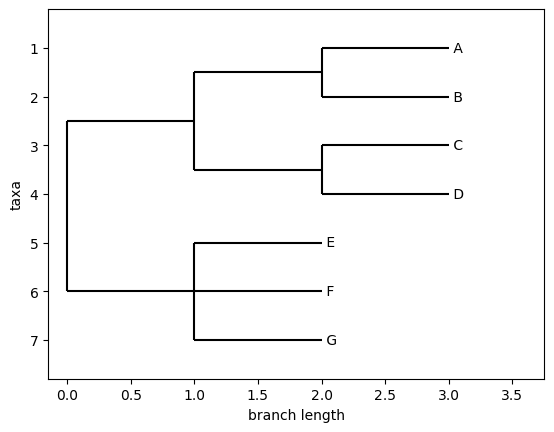

In [128]:
import matplotlib.pyplot as plt

Phylo.draw(tree)